<p align=center> <img src='https://www.scdn.co/i/_global/open-graph-default.png' width='500'> </p>

<h1 align='center'> Spotify </h1>
<h2 align='center'> Data Analysis </h2>

<h3 align=left>
    <br> - PHASE 1 --> Preparation </br>
    <br> - PHASE 2 --> Exploratory Data Analysis - EDA </br>
</h3>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from sklearn.preprocessing import MultiLabelBinarizer
import re
from wordcloud import WordCloud, STOPWORDS
import locale
#%matplotlib inline
print("Libraries have been correctly imported!")

Libraries have been correctly imported!


In [3]:
#Nella scrittura del filepath ruotiamo sempre gli slash. Non dobbiamo mai avere backslash \ ma solo slash /
spotify_dataset='/Users/francescocrovella/Desktop/Spotify/spotify_dataset.csv'
spotify_df=pd.read_csv(spotify_dataset,on_bad_lines='skip')

print("The dataset has been correctly imported!")

The dataset has been correctly imported!


In [4]:
spotify_df.head(2)

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010


In [5]:
spotify_df.shape

(12891680, 4)

In [6]:
spotify_df.dtypes

user_id            object
 "artistname"      object
 "trackname"       object
 "playlistname"    object
dtype: object

<h1 align=center> PHASE 1/2 </h3>
<h1 align=center> DATA CLEANING & PREPROCESSING </h3>

These are the most important basic information methods for a dataset cleaning + preprocessing:

- df.shape ---> number of rows and columns
- df.columns ---> columns array
- df.count() ---> number of records
- df.info() ---> different file info, including dtypes
- df.drop_duplicates()
- df.describe()
- df.nunique()
<br></br>
Unnecessary columns handling:
- df.drop(["columnName"],axis=1,inplace=True)
<br></br>
Missing values handling:
- df.isna().sum(axis=0) --- calcolo delle celle nulle per ogni colonna
<br></br>

In [7]:
spotify_df.columns

Index(['user_id', ' "artistname"', ' "trackname"', ' "playlistname"'], dtype='object')

We habve to clean the columns name since there are no significant ""

In [8]:
spotify_df.columns=spotify_df.columns.str.replace(' ','')
spotify_df.columns=spotify_df.columns.str.replace(' ','')
spotify_df.columns=spotify_df.columns.str.replace(' ','')

spotify_df.columns=spotify_df.columns.str.replace('"artistname"','artistname')
spotify_df.columns=spotify_df.columns.str.replace('"trackname"','trackname')
spotify_df.columns=spotify_df.columns.str.replace('"playlistname"','playlistname')

In [9]:
spotify_df.columns

Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')

In [10]:
spotify_df.count()

user_id         12891680
artistname      12858112
trackname       12891595
playlistname    12890434
dtype: int64

Since there are different counts, this represents the presence of "NaN" values. This is a problem to be resolved.

In [11]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   artistname    object
 2   trackname     object
 3   playlistname  object
dtypes: object(4)
memory usage: 393.4+ MB


In [12]:
#Drop of duplicates

spotify_df.drop_duplicates()
print('duplicates dropped')

duplicates dropped


In [13]:
#We can use df.nunique() method in order to study the df structure and data granularity
spotify_df.nunique()

user_id           15918
artistname       289821
trackname       2032044
playlistname     157504
dtype: int64

This is the result of df.nunique():

- the dataset is structured on 'user_id'
- the entity relation model is the following: user_id - other columns --> 1-n

In [14]:
spotify_df.describe()

,user_id,artistname,trackname,playlistname
count,12891680,12858112,12891595,12890434
unique,15918,289821,2032044,157504
top,4398de6902abde3351347b048fcdc287,Daft Punk,Intro,Starred
freq,295275,36086,6676,1337085


In [15]:
#missing values handling --_> df.isna()
spotify_df.isna().sum(axis=0)

user_id             0
artistname      33568
trackname          85
playlistname     1246
dtype: int64

### since the user_id column has no missing values, we can't drop any rows but we have toi sostitute the missing values as following:

- column artistname   --------> fill with "Unknown"
- column trackname    --------> fill with "Unknown"
- column playlistname --------> fill with "Unknown"

In [16]:
empty_columns_tobefilled_unknown=['artistname','trackname','playlistname']

for i in spotify_df[empty_columns_tobefilled_unknown]:
    spotify_df[i]= spotify_df[i].fillna('Unknown')

#missing values re-check. We need only 0 values
spotify_df.isna().sum(axis=0)

user_id         0
artistname      0
trackname       0
playlistname    0
dtype: int64

<h1 align=center> PHASE 2/2 </h3>
<h1 align=center> EXPLORATORY DATA ANALYSIS - EDA </h3>

- df['columns'].value_counts()
<br></br>
- COUNTPLOT --> non numerical bar chart
- BARPLOT --> bar chart
- HEATMAP --> colored correlation matrix
- HISTPLOT --> histogram for sdistributions
- WORDCLOUD --> a word with the most common words of the dataset

<h1 align='center'> <b> SPOTIFY TOP SONGS ANALYSIS </b> </h1>

## TOP SONGS AND ARTISTS

In [38]:
spotify_df['trackname - artistname']=spotify_df['trackname']+' - '+spotify_df['artistname']

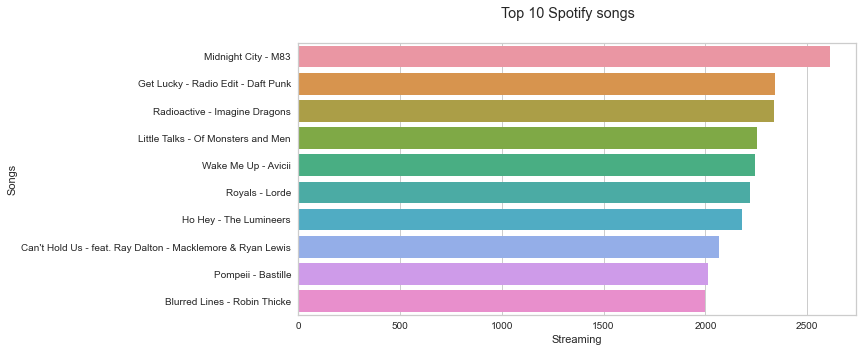

In [39]:
plt.figure(figsize=(10,5))
trackname=spotify_df['top songs'].value_counts()[:10]
sns.barplot(x=trackname,y=trackname.index)
plt.suptitle('Top 10 Spotify songs')
plt.xlabel('Streaming')
plt.ylabel('Songs')
plt.show()

In [40]:
artist_df=spotify_df[spotify_df['artistname']!='Unknown']
artist_df.head()

,user_id,artistname,trackname,playlistname,top songs,trackname - artistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,(The Angels Wanna Wear My) Red Shoes - Elvis C...,(The Angels Wanna Wear My) Red Shoes - Elvis C...
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,"(What's So Funny 'Bout) Peace, Love And Unders...","(What's So Funny 'Bout) Peace, Love And Unders..."
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,7 Years Too Late - Tiffany Page,7 Years Too Late - Tiffany Page
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,Accidents Will Happen - Elvis Costello & The A...,Accidents Will Happen - Elvis Costello & The A...
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,Alison - Elvis Costello,Alison - Elvis Costello


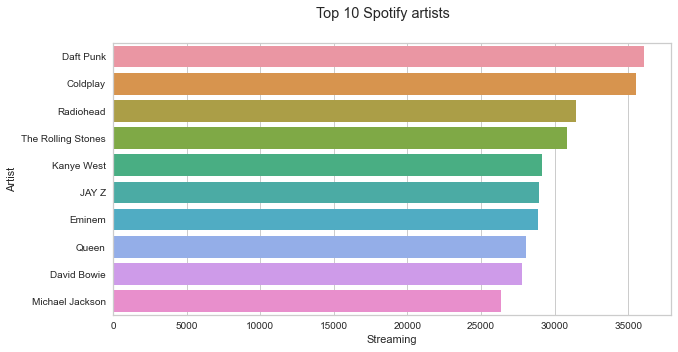

In [41]:
plt.figure(figsize=(10,5))
artistname=artist_df['artistname'].value_counts()[:10]
sns.barplot(x=artistname,y=artistname.index)
plt.suptitle('Top 10 Spotify artists')
plt.xlabel('Streaming')
plt.ylabel('Artist')
plt.show()